# 바이러스

## 문제
한국의 한 연구소에서는 바이러스를 연구하고있습니다.

이 바이러스는 아래와 같은 격자모양의 상자에 넣어서 보관하고 있습니다.

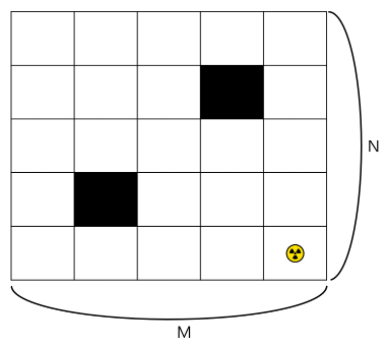

바이러스는 이 격자에 보관되며, 하루가 지나면 바이러스의 상, 하, 좌, 우에 있는 칸이 바이러스에 오염됩니다.

바이러스는 검은색 벽을 통과할 수 없고, 대각선에는 영향을 미치지 못한다고 할 때 모든 격자가 바이러스에 감염되는 최소 일수를 구하세요.

입력은 격자의 가로 칸 수 N과 세로 칸 수 M이 첫줄에,  
둘째 줄 부터 N개의 줄에는 상자의 상태에 대한 정보가 입력되며, 바이러스는 1, 격자는 0, 벽은 -1로 표현된다.

In [ ]:
# 입력 예시
4 6
1 -1 0 0 0 0
0 -1 0 0 0 0
0 0 0 0 -1 0
0 0 0 0 -1 1

In [263]:
N, M = map(int, input("격자의 가로 칸 수(N)와 세로 칸 수(M)을 공백을 가지고 입력하세요").split())

num_list = [] # 값들이 들어간 격자 테두리에 공백(' ')의 값을 가진 원소를 넣음
for i in range(N): 
    num_list.append([])
    num_list[i].append(' ')
    column = input(f"{N+1}번째 행의 값들을 공백을 가지고 입력하세요(세로 칸 수 {M}개)").split()
    for j in range(M):
        num_list[i].append(column[j])
    num_list[i].append(' ')
gap = [' '] * (M+2)     
num_list.insert(0, gap)
num_list.append(gap)

print(num_list)

격자의 가로 칸 수(N)와 세로 칸 수(M)을 공백을 가지고 입력하세요4 6
5번째 행의 값들을 공백을 가지고 입력하세요(세로 칸 수 6개)1 -1 0 0 0 0
5번째 행의 값들을 공백을 가지고 입력하세요(세로 칸 수 6개)0 -1 0 0 0 0
5번째 행의 값들을 공백을 가지고 입력하세요(세로 칸 수 6개)0 0 0 0 -1 0
5번째 행의 값들을 공백을 가지고 입력하세요(세로 칸 수 6개)0 0 0 0 -1 1
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', '1', '-1', '0', '0', '0', '0', ' '], [' ', '0', '-1', '0', '0', '0', '0', ' '], [' ', '0', '0', '0', '0', '-1', '0', ' '], [' ', '0', '0', '0', '0', '-1', '1', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']]


In [264]:
day = 0 # 최소 일수를 나타내는 변수

# 읽은 값이 1일때 상, 하, 좌, 우의 값들이 0이면 1로 바꿈
# 처음부터 끝까지 한번씩 읽는 거를 반복한다.
# 그런데 한번의 반복이 끝나지 않는 상황에서 값을 읽다가 1로 새롭게 바뀐 값 주변을 또 1로 바꾸는 경우가 발생
# 따라서 바로 1로 바꾸는게 아닌, 임시로 k값으로 바꾼뒤,
# 처음부터 끝까지 한번씩 읽는 것을 완료하면 k값을 다시 1로 바꿈

while True:
    for i in range(N): # 값이 담긴 격자(N X M) 모두를 읽음
        for j in range(M):
            if num_list[i+1][j+1] == '1': # 읽은 값이 1일때
                # 읽은 값의 위쪽이 0일때 k로 바꿈
                if num_list[i][j+1] == '0':
                    num_list[i][j+1] = 'k'
                # 읽은 값의 아래쪽이 0일때 k로 바꿈
                if num_list[i+2][j+1] == '0':
                    num_list[i+2][j+1] = 'k'
                # 읽은 값의 왼쪽이 0일때 k로 바꿈
                if num_list[i+1][j] == '0':
                    num_list[i+1][j] = 'k'
                # 읽은 값의 오른쪽이 0일때 k로 바꿈
                if num_list[i+1][j+2] == '0':
                    num_list[i+1][j+2] = 'k'
    # 처음부터 끝까지 읽는 것을 완료 후 k값을 1로 바꿈
    for i in range(N):
        for j in range(M):
            if num_list[i+1][j+1] == 'k':
                num_list[i+1][j+1] = '1'              
    day += 1 
    
    # 모든 행에 0이 없다면 종료
    test = 0
    for i in range(N):
        if '0' not in  num_list[i+1]:
            test += 1
    if test == N:
        break

print(f"바이러스가 모든 격자를 감염시키는 최소 일수는 {day}일 입니다.")

바이러스가 모든 격자를 감염시키는 최소 일수는 6일 입니다.
